In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn (1) (1).csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print(df.head().to_string())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges Churn
0  7590-VHVEG  Female              0     Yes         No       1           No  No phone service             DSL             No          Yes               No          No          No              No  Month-to-month              Yes           Electronic check           29.85        29.85    No
1  5575-GNVDE    Male              0      No         No      34          Yes                No             DSL            Yes           No              Yes          No          No              No        One year               No               Mailed check           56.95       1889.5    No
2  3668-QPYBK    Male              0      No         No       2          Yes                No             DSL            Yes  

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#1. Data Manipulation:
#● Extract the 5th column and store it in ‘customer_5'
customer_5 = df.iloc[:,4]
customer_5

0       No
1       No
        ..
7041    No
7042    No
Name: Dependents, Length: 7043, dtype: object

In [8]:
#● Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:,14]
customer_15

0        No
1        No
       ... 
7041     No
7042    Yes
Name: StreamingMovies, Length: 7043, dtype: object

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
#● Extract all the male senior citizens whose payment method is electronic
#check and store the result in ‘senior_male_electronic’

df[(df['gender']=='Male') & (df["SeniorCitizen"] == 1) & (df["PaymentMethod"] == "Electronic check")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes


In [11]:
#● Extract all those customers whose tenure is greater than 70 months or
#their monthly charges is more than $100 and store the result in
#‘customer_total_tenure’

customer_total_tenure = df[(df['tenure']>70) | (df['MonthlyCharges']>100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [12]:
#● Extract all the customers whose contract is of two years, payment method
#is mailed check and the value of churn is ‘Yes’ and store the result in
#‘two_mail_yes’

two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [13]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [14]:
#● Extract 333 random records from the customer_churn dataframe and store
#the result in ‘customer_333’

customer_333 = df.sample(333, random_state = 42)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
185,1024-GUALD,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
2715,0484-JPBRU,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5141,0303-WMMRN,Male,0,No,No,5,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.25,86.05,No
2087,3806-DXQOM,Female,0,No,No,4,No,No phone service,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,33.65,137.85,Yes


In [15]:
#● Get the count of different levels from the ‘Churn’ column

df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

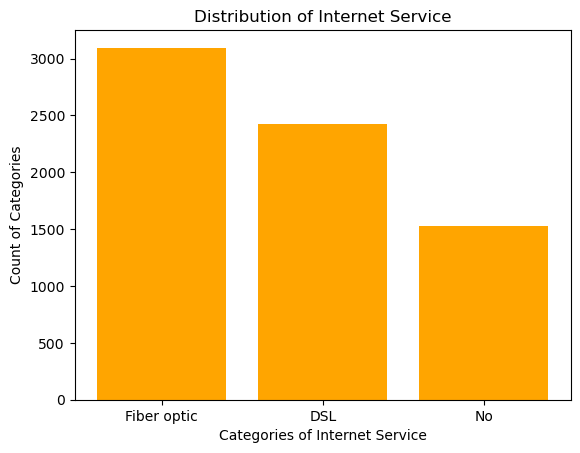

In [17]:
#2. Data Visualization:
#● Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange’


Is_Count=df['InternetService'].value_counts()

plt.bar(Is_Count.index,Is_Count.values,color='orange',label='Internet Services')
plt.title('Distribution of Internet Service')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.show()

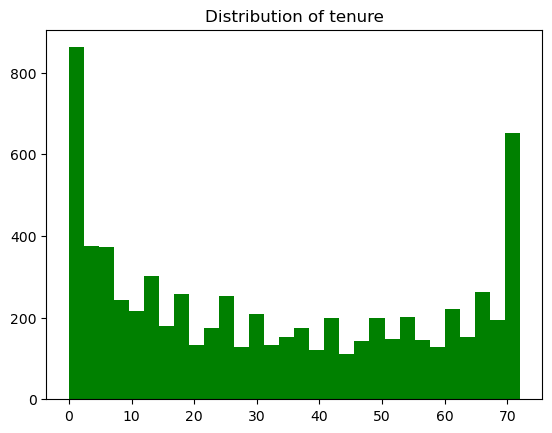

In [18]:
#● Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure’

plt.hist(df['tenure'],color='green',bins=30)
plt.title('Distribution of tenure')
plt.show()

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

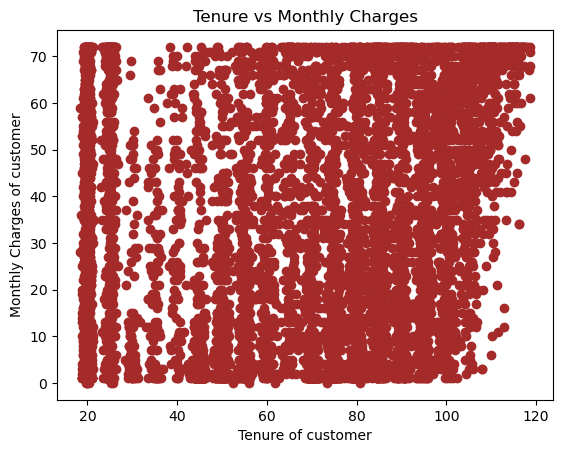

In [20]:
#● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
#‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#a. Assign the points a color of ‘brown’
#b. Set the x-axis label to ‘Tenure of customer’
#c. Set the y-axis label to ‘Monthly Charges of customer’
#d. Set the title to ‘Tenure vs Monthly Charges’

plt.scatter(df['MonthlyCharges'],df['tenure'], c='brown')
plt.xlabel('Tenure of customer')           
plt.ylabel('Monthly Charges of customer')           
plt.title('Tenure vs Monthly Charges')         
plt.show()

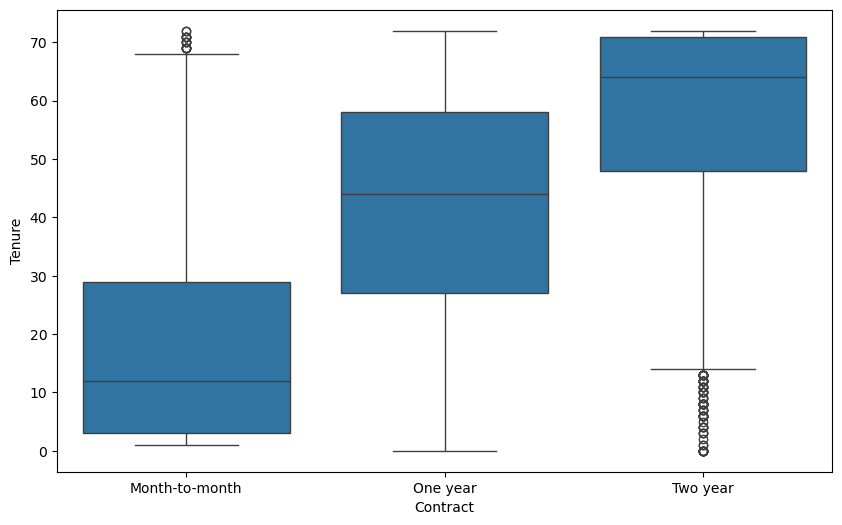

In [21]:
#e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
#f. ‘Contract’ on the x-axis.

plt.figure(figsize=(10,6))
sns.boxplot(df, x=df['Contract'], y=df['tenure'])
plt.xlabel('Contract')           
plt.ylabel('Tenure')           
plt.show()            


In [22]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

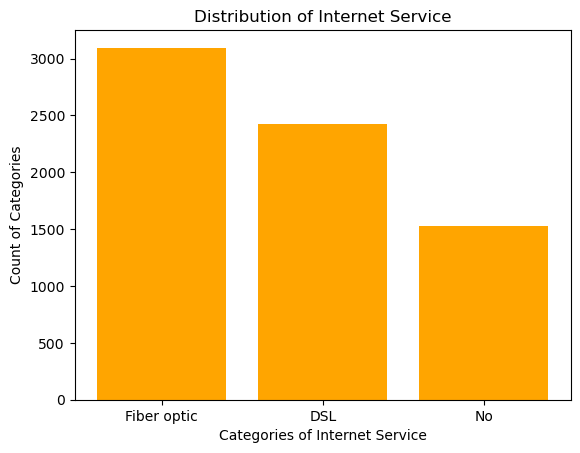

In [23]:
#2. Data Visualization:
#● Build a bar-plot for the ’InternetService’ column:
#a. Set x-axis label to ‘Categories of Internet Service’
#b. Set y-axis label to ‘Count of Categories’
#c. Set the title of plot to be ‘Distribution of Internet Service’
#d. Set the color of the bars to be ‘orange’

plt.bar(df['InternetService'].value_counts().index, df['InternetService'].value_counts().values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

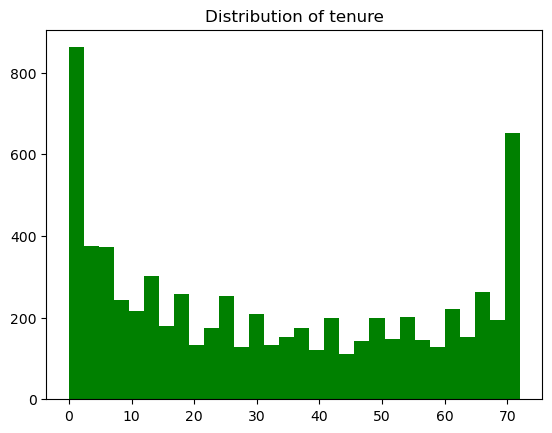

In [24]:
#● Build a histogram for the ‘tenure’ column:
#a. Set the number of bins to be 30
#b. Set the color of the bins to be ‘green’
#c. Assign the title ‘Distribution of tenure’

plt.hist(df['tenure'], bins=30, color='green')
plt.title('Distribution of tenure')
plt.show()

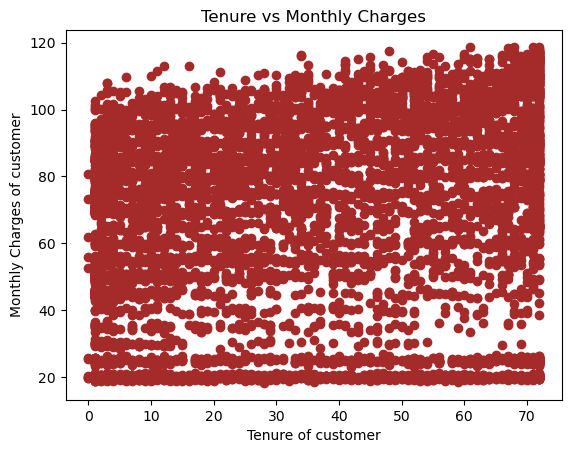

In [25]:
#● Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
#‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:
#a. Assign the points a color of ‘brown’
#b. Set the x-axis label to ‘Tenure of customer’
#c. Set the y-axis label to ‘Monthly Charges of customer’
#d. Set the title to ‘Tenure vs Monthly Charges’

plt.scatter(y=df['MonthlyCharges'], x=df['tenure'], c='brown')
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

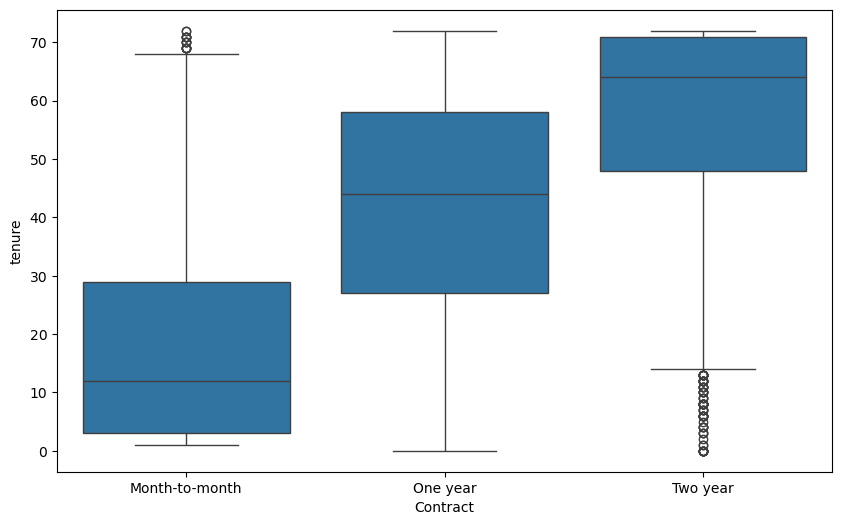

In [26]:
#e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis &
#f. ‘Contract’ on the x-axis.

plt.figure(figsize=(10,6))
sns.boxplot(df, x=df['Contract'], y=df['tenure'])
plt.xlabel('Contract')
plt.ylabel('tenure')
plt.show()

In [27]:
# 3. Linear Regression:
# ● Build a simple linear model where dependent variable is ‘MonthlyCharges’
# and independent variable is ‘tenure’:
# a. Divide the dataset into train and test sets in 70:30 ratio.
# b. Build the model on train set and predict the values on test set
# c. After predicting the values, find the root mean square error
# d. Find out the error in prediction & store the result in ‘error’
# e. Find the root mean square error

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [29]:
x = df[['tenure']]
y = df['MonthlyCharges']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [31]:
x_train

,tenure
1695,54
1095,1
...,...
5390,12
860,26


In [32]:
x_test

,tenure
185,1
2715,41
...,...
2392,20
6705,22


In [33]:
y_train

1695    70.70
1095    80.55
        ...  
5390    99.45
860     19.80
Name: MonthlyCharges, Length: 4930, dtype: float64

In [34]:
y_test

185     24.80
2715    25.25
        ...  
2392    90.70
6705    51.10
Name: MonthlyCharges, Length: 2113, dtype: float64

In [35]:
lr = LinearRegression()

In [36]:
lr.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr.predict(x_test)

In [38]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

29.07936015646814

In [39]:
error = y_pred - y_test
print("Error: ", error)

Error:  185     30.306590
2715    42.185209
          ...    
2392   -29.737316
6705    10.479115
Name: MonthlyCharges, Length: 2113, dtype: float64


In [40]:
r2_score(y_test, y_pred)

0.05856035027031614

In [41]:
# 4. Logistic Regression:
# ● Build a simple logistic regression model where dependent variable is
# ‘Churn’ and independent variable is ‘MonthlyCharges’:
# a. Divide the dataset in 65:35 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and get the accuracy score



In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
x = df[['MonthlyCharges']]
y = df['Churn']

In [44]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.35, random_state=42)

In [45]:
log = LogisticRegression()
log.fit(x_train, y_train)

LogisticRegression()

In [46]:
y_pred = log.predict(x_test)

In [47]:
cfm = confusion_matrix(y_test, y_pred)
print(cfm)

[[1797    0]
 [ 669    0]]


In [48]:
accuracy_score(y_test, y_pred)

0.7287104622871047

In [49]:
# d. Build a multiple logistic regression model where dependent variable
# is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
# e. Divide the dataset in 80:20 ratio
# f. Build the model on train set and predict the values on test set
# g. Build the confusion matrix and get the accuracy score

In [50]:
x = df[['MonthlyCharges','tenure']]
y = df['Churn']

In [51]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [52]:
log2 = LogisticRegression()
log2.fit(x_train, y_train)

LogisticRegression()

In [53]:
y_pred = log2.predict(x_test)

In [54]:
print(confusion_matrix(y_test, y_pred))

[[944  92]
 [193 180]]


In [55]:
print(accuracy_score(y_test, y_pred))

0.7977288857345636


In [56]:
# 5. Decision Tree:
# ● Build a decision tree model where dependent variable is ‘Churn’ and
# independent variable is ‘tenure’:
# a. Divide the dataset in 80:20 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
x = df[['tenure']]
y = df['Churn']

In [59]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [60]:
dt = DecisionTreeClassifier(max_depth = 5)

In [61]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [62]:
y_pred = dt.predict(x_test)

In [63]:
print(accuracy_score(y_test, y_pred))

0.7572746628814763


In [64]:
print(confusion_matrix(y_test, y_pred))

[[951  85]
 [257 116]]


In [65]:
# 6. Random Forest:
# ● Build a Random Forest model where dependent variable is ‘Churn’ and
# independent variables are ‘tenure’ and ‘MonthlyCharges’:
# a. Divide the dataset in 70:30 ratio
# b. Build the model on train set and predict the values on test set
# c. Build the confusion matrix and calculate the accuracy

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
x = df[['tenure','MonthlyCharges']]
y = df['Churn']

In [68]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [69]:
rf = RandomForestClassifier(n_estimators=50, criterion = 'gini', max_depth = 5)

In [70]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [71]:
y_pred = rf.predict(x_test)

In [72]:
print(accuracy_score(y_test, y_pred))

0.7898722195929957


In [73]:
print(confusion_matrix(y_test, y_pred))

[[1429  110]
 [ 334  240]]


In [74]:
arr = []
for i in range(50,61):
    row = []
    for j in range(4, 11):
        rf = RandomForestClassifier(n_estimators=i, max_depth = j)
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        row.append(round(accuracy_score(y_test, y_pred)*100,2))
    arr.append(row)
print(np.array(arr))

[[78.32 79.03 79.03 79.27 78.99 78.7  78.51]
 [78.75 79.18 78.99 78.94 79.08 78.99 78.42]
 [77.99 79.08 79.08 78.94 79.08 78.61 78.04]
 [77.85 79.03 79.27 79.51 78.89 78.18 78.37]
 [78.66 79.03 79.13 79.27 78.8  78.7  78.14]
 [79.08 78.94 78.94 79.03 78.75 78.42 78.23]
 [77.99 79.27 79.22 79.32 78.8  78.8  78.32]
 [78.94 79.08 78.94 78.56 79.27 78.7  77.85]
 [78.28 78.66 79.27 79.37 79.37 78.66 78.51]
 [78.56 78.99 78.94 78.8  79.03 78.75 78.04]
 [78.32 79.08 78.99 79.27 78.99 78.99 78.42]]


In [75]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10,15],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

In [76]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 5, scoring = 'accuracy')

In [77]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [78]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=300)

In [79]:
grid_search.score(x, y)

0.818259264517961

In [80]:
grid_search.best_score_

0.786815415821501

In [81]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 300}

In [192]:
rf1 = RandomForestClassifier(n_estimators = 100, max_depth = 10, random_state = 42, min_samples_leaf = 4, min_samples_split = 10)
rf1.fit(x_train, y_train)
y_pred = rf1.predict(x_test)
print(round(accuracy_score(y_test, y_pred)*100,2))
print(confusion_matrix(y_test, y_pred))

78.89
[[1412  127]
 [ 319  255]]
